<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

Загрузили необходимые библиотеки и инструменты.

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Загрузили и изучили данные.

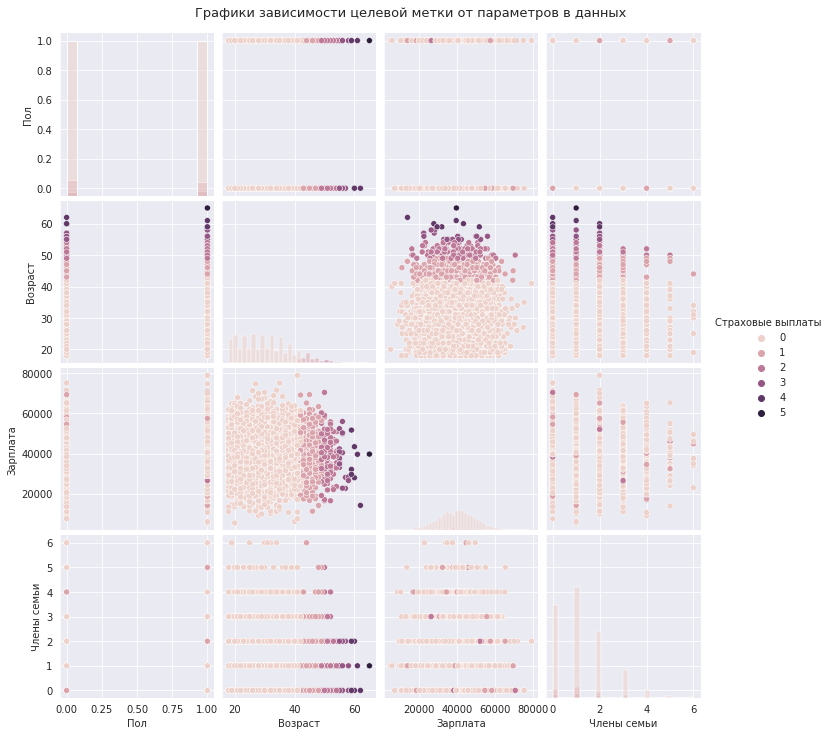

In [5]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='Страховые выплаты', height=2.5, diag_kind='hist')
plt.suptitle("Графики зависимости целевой метки от параметров в данных", y=1.02, fontsize=13)
plt.show()

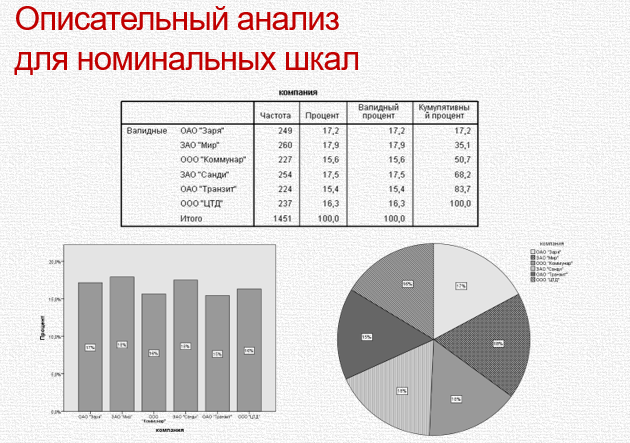

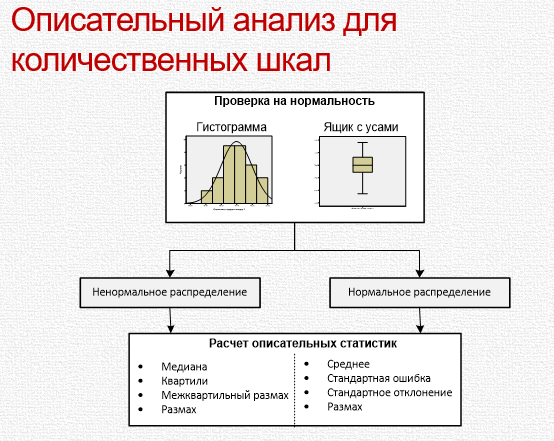

Просмотрели зависимость целевого значения от других признаков в наших данных на гарфиках.

In [6]:
features=data.drop(['Страховые выплаты'],axis=1)
target=data['Страховые выплаты']

Разделили данные на признаки и целевой признак.

In [7]:
train_features, test_features, train_target, test_target = train_test_split(features,target, test_size=0.30, random_state=254)

Разделили данные на тренировочную и тестовую выборки.

In [8]:
tv=train_features.shape[0]/features.shape[0]
tt=test_target.shape[0]/target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tv))
print('Размер тестовой выборки - {:.0%}'.format(tt))

Размер тренировочной выборки- 70%
Размер тестовой выборки - 30%


Все отлично.

<h1>Вывод:</h1>

Загрузили все необходимые бибилиотеки и инструменты. Загрузили и изучили данные. Все данные на месте и не требуют предобработки. Из графиков видно что, по объёму не выплат страховок больше всего, а если и производятся то чаще всего это люди старше 40 лет с семьями от 2х человек

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

In [9]:
class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Создали модель по исходным формулам для предсказания значений по неизменённым признакам

In [10]:
model_l = LinearRegression()
model_l.fit(train_features,train_target)
predictions= model_l.predict(test_features)

R2_score_l = r2_score(test_target, predictions)
MSE_l = mean_squared_error(predictions,test_target)

print("R2_score Линейной регрессии неизменённой матрицы:", R2_score_l.round(2))
print("MSE Линейной регрессии неизменённой матрицы:", MSE_l.round(2))

R2_score Линейной регрессии неизменённой матрицы: 0.43
MSE Линейной регрессии неизменённой матрицы: 0.11


Вычислили значения R2 и MSE для предсказанных значений по исходным (неизменённым данным)

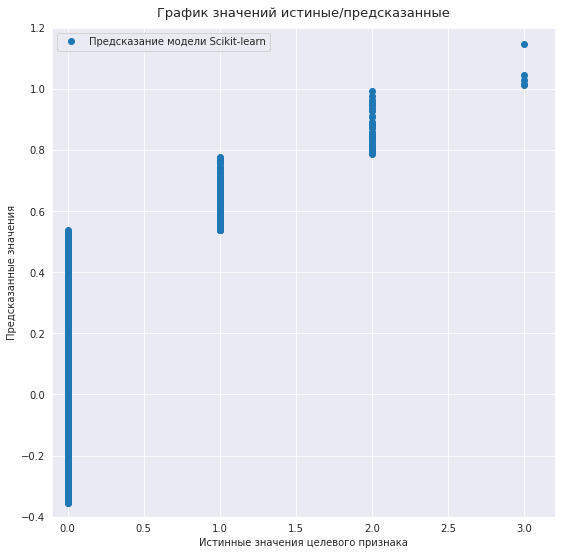

In [11]:
plt.figure(figsize=(9,9))
plt.plot(test_target,predictions,'o',alpha=1)
plt.legend(['Предсказание модели Scikit-learn'])
#plt.plot([-0.1,3.2],[-0.5,1.2],linestyle='--',color='g',alpha=0.3)
plt.xlim(-0.1,3.2)
plt.ylim(-0.4,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

Построили график зависимости значений истинные/предсказанные модели линейной регрессии из Scikit-learn

In [12]:
model = LinearRegress()
model.fit(train_features, train_target)
predict = model.predict(test_features)

R2_score = r2_score(test_target, predict)
MSE = mean_squared_error(predict,test_target)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.43
MSE: 0.11


<h1>Далее мы произведем изменение признаков исходной матрицы данных методом умножения их на произвольную обратимую матрицу</h1>

In [13]:
matrix=np.random.normal(3, size=(4,4))
matrix

array([[2.41907195, 3.36681975, 2.07908492, 2.68142537],
       [3.57014041, 2.17297562, 3.07182386, 1.27576822],
       [3.75911973, 4.10046004, 1.91811583, 4.71063341],
       [2.16983729, 3.67072951, 4.2575752 , 1.39419527]])

Создали произвольную матрицу совпадаюзую по размеру с нашей.

In [14]:
np.linalg.inv(matrix)

array([[ 0.93557678,  0.55107486, -0.49489796, -0.63150425],
       [ 2.67343866,  0.0052838 , -1.31044377, -0.71894302],
       [-2.04834113, -0.16141793,  0.93423033,  0.93070831],
       [-2.23968139, -0.3786336 ,  1.36751057,  0.75078881]])

Проверили обратимость.

In [15]:
train_matrix=train_features.dot(matrix)
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
2593,139931.696255,152599.973260,71438.226951,175271.651289
2846,103513.627883,112848.894961,52869.172256,129592.292298
3087,185813.359094,202633.759054,94854.406205,232746.233708
3357,166634.077396,181723.733125,85072.500893,208721.082805
4934,101970.326910,111191.170540,52072.586449,127696.923761


Произвели умножение признаков тренировочной выборки на произвольную матрицу.

In [16]:
test_matrix = test_features.dot(matrix)
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,142983.234031,155904.919248,73008.395751,179055.348812
4959,129851.826241,141573.992323,66324.114924,162577.287630
1728,142201.830191,155062.578861,72596.933158,178100.216131
4169,165123.919990,180072.536920,84292.481835,206832.646853
1984,167802.485164,182976.276116,85680.539954,210148.187853


Произвели умножение признаков тестовой выборки на произвольную матрицу.

In [17]:
model_t = LinearRegression()
model_t.fit(train_matrix,train_target)
predictions_t= model_t.predict(test_matrix)
print("R2_score Линейной регрессии изменённой матрицы:", r2_score(test_target,predictions_t).round(2))
print("MSE Линейной регрессии изменённой матрицы:", mean_squared_error(predictions_t,test_target).round(2))

R2_score Линейной регрессии изменённой матрицы: 0.43
MSE Линейной регрессии изменённой матрицы: 0.11


Проверили. Все отлично.

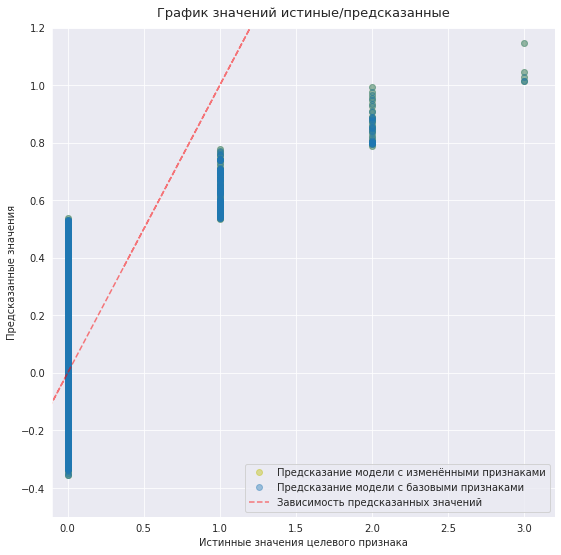

In [18]:
plt.figure(figsize=(9,9))
plt.plot(test_target,predictions_t,'yo',alpha=0.4)
plt.plot(test_target,predictions,'o',alpha=0.4)
plt.plot(predictions_t,predictions,'r--',alpha=0.5)
plt.legend(['Предсказание модели c изменёнными признаками', 'Предсказание модели c базовыми признаками', 'Зависимость предсказанных значений'])

plt.xlim(-0.1,3.2)
plt.ylim(-0.5,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

Нанесли на график зависимости значений истинные/предсказанные модели линейной регрессии предсказанные значения модели на изменённых данных.

**Ответ:** Если признаки исходных данных умножить на обратимую матрицу, то качество линейной регрессии не изменится.

**Обоснование:** Изменение качества предсказания линейной регрессии не происходит при умножении признаков исходных данных, на обратимую матрицу, т.к. параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. По результату скалярного умножения создаётся число, на которое умножается тестовая выборка, и если эта выборка была преобразована умножением на ту же матрицу, то качество предсказания не изменится.

Таким образом, если изменить исходные данные методом умножения признаков на обратимую матрицу, не изменяя значений целевого признака, качество предсказания модели не изменится.

## Алгоритм преобразования

**Алгоритм**

Умножение матрицы на матрицу возможно, если ширина первой матрицы $А(𝑚×𝑛)$ равна высоте второй матрицы $P (𝑛×r)$. Тогда размер произведения этих матриц будет $m×r$. Размерность n «cхлопывается».
При умножении признаков выборки $A$ размерностью $(3750,4)$ на обратимую произвольную матрицу $P$ размерностью $(4,4)$, результатом получаем новый *(изменённый)* набор данных скалярных произведений $M$ размернотью $(3750, 4)$
        Формула выглядит следующим образом:
        
        Mij = (Ai,Bj)
        
        В каждую новую ячейку записывается результат сложения произведений строки $i$ на столбец $j$. Так например в первой ячейке новой таблицы будет записан результат по этой формуле:\n",
        
        M_{11}=A_{11}×P_{11} + A_{12}×P_{21} + A_{13}×P_{31} + A_{14}×P_{41}
        
        
        Далее вычисляется важный параметр - вектор $w$ по формуле:
        
        w = (X^T X)^{-1} X^T y
        
        В которой $X$ - таблица признков, где нулевой столбец заполнен $1$ (единицами), а $y$ - вектор целевого признака
        
        X_{i} = (1  M_{i2} M_{i3} M_{i4} M_{i5})
        
        
        В `Линейной регрессии` предсказания вычисляются по формуле:
        
        a = Xw + w0
         
        где $w0$ - значение нулевого аргумента вектора $w$, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения $MSE$"
        
        
        Рассмотрим упрощённую запись формулы предсказания `Линейной регрессии`
        
        a = X_i w,
        где $X_i$ - новые строки признаков
        Подставим вместо параметра $w$, формулу её вычисления:
        
$$a = X_i w = X_i (X^T X)^{-1} X^T y$$
        
        
        Упроситим формулу используя принцип ассоциативности ($A(BC) = (AB)C$) и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке ($(AB)^T = B^T A^T$)
        
        
$$a = X_i (X^T X)^{-1} X^T y = X_iX^{-1}(X^T)^{-1}X^T y = X_iX^{-1}y$$
        
        
        Домножим наши признаки на случайную матрицу $P$, в которой число строк равно чилу столбцов $X$ и $P$ - обратима, то есть из матрицы $P$ можно получить матрицу $P^{-1}$, при этом $PP^{-1} = E$, где $E$ - единичная матрица 
        
        Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты $w'$
       
$$w' = ((XP)^T(XP))^{-1}(XP)^Ty$$
        
        
        Подставим их в формулу предсказания и упростим выражение
        
        
$$a'= X_iPw' = X_iP((XP)^T(XP))^{-1}(XP)^Ty = X_iP(XP)^{-1}((XP)^T)^{-1}(XP)^Ty = X_iX^{-1}y$$
        
        
        Таким образом мы пришли к заключению, о том что результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов наших преобразований очевидно, что $a$ = $a'$"
     
      
    

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
....
$$

$$
w_1 = (P^T (X^T X) P)^{-1} P^T X^T y 
$$

$$
w_1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$

$$
w_1 = P^{-1} (X^T X)^{-1} E X^T y 
$$

$$
w_1 = P^{-1}w
$$      

Алгоритм преобразования (план действий):
1. Создаём рандомную матрицу $P$
2. Проверяем её на обратимость 
3. Создаём новую матрицу данных $M$ 
4. Ищем метрики качества $R2 score$ и $MSE$ на исходных данных и на преобразованных
5. Опишем вывод полученных результатов

**Обоснование**

Это значит, что если мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. Проверим работу данного алгоритма в следующей главе.

## Проверка алгоритма

In [19]:
P = np.random.normal(3, size=(4,4))
P

array([[4.44560045, 3.09452661, 3.37113242, 1.94101657],
       [3.71779448, 3.99593789, 2.39605961, 4.72060458],
       [2.71042251, 2.26038175, 2.13074482, 3.18979423],
       [5.14001809, 2.43996813, 1.93161766, 2.20811319]])

Создали матрицуу P

In [20]:
np.linalg.inv(P)

array([[-0.15302367, -0.16431395,  0.04365237,  0.42273221],
       [ 0.37262353,  0.87580038, -1.3563467 , -0.2405261 ],
       [ 0.37951908, -0.50424727,  0.77176778, -0.37048881],
       [-0.38753939, -0.14416626,  0.72202299,  0.05872323]])

Она обратима.

In [21]:
M =train_features.dot(P)
M.columns = train_features.columns
M.head()

,Пол,Возраст,Зарплата,Члены семьи
2593,100931.670207,84190.078032,79328.447128,118779.997227
2846,74683.035330,62314.783703,58688.464452,87900.932499
3087,134015.263815,111789.172439,105335.003608,157724.381974
3357,120192.657872,100252.561673,94464.415637,141444.173306
4934,73565.260633,61366.658274,57812.252117,86570.004189


Выполнили умножение признаков тренировочной выборки на нашу новую матрицу и обозначили её M

In [22]:
test_M = test_features.dot(P)
test_M.columns = test_features.columns
test_M.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,103143.199528,86047.890656,81062.260142,121390.992360
4959,93690.001952,78164.755540,73621.453348,110259.719494
1728,102565.504846,85562.308246,80614.036011,120715.840151
4169,119093.068813,99341.089069,93606.322856,140161.631273
1984,121045.258142,100976.187484,95130.460181,142455.550717


Выполнили умножение признаков тестовой выборки на нашу новую матрицу и обозначили её M

Целевые признаки оставляем без изменений.

In [23]:
X = np.concatenate((np.ones((M.shape[0], 1)), M), axis=1)

Далее в нулевой столбец нашей изменённой таблицы вносим значение 1

In [24]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,100931.670207,84190.078032,79328.447128,118779.997227
1,1.0,74683.035330,62314.783703,58688.464452,87900.932499
2,1.0,134015.263815,111789.172439,105335.003608,157724.381974
3,1.0,120192.657872,100252.561673,94464.415637,141444.173306
4,1.0,73565.260633,61366.658274,57812.252117,86570.004189


In [25]:
y = train_target
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

Присвоили переменной $у$, целевые признаки и вычислим по формуле ( $w = (X^T X)^{-1} X^T y$ )  вектор $w$

In [26]:
a = test_M.dot(w[1:]) + w[0]

Вычислили предсказание модели методом умножения тестовой выбрки $test_M$  и увеличили на величину сдвига значение $w0$  Переменную предсказанных значений обозначили $a$

In [27]:
R2_score_m=r2_score(test_target, a)
MSE_m=mean_squared_error(a, test_target)
print("R2_score:",R2_score_m.round(2))
print("MSE:", MSE_m.round(2))

R2_score: 0.43
MSE: 0.11


Проверили значения R2 и MSE

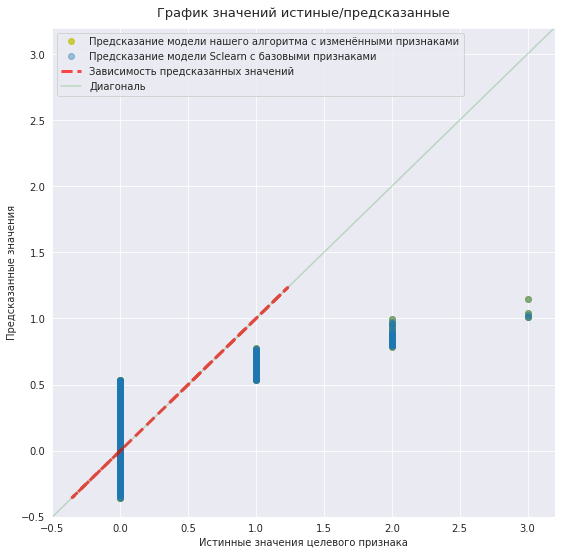

In [28]:
plt.figure(figsize=(9,9))
plt.plot(test_target,a,'yo',alpha=0.7)
plt.plot(test_target,predictions,'o',alpha=0.4)
plt.plot(a,predictions,'r--',alpha=0.7,linewidth = 3)
plt.plot([-0.5,3.2],[-0.5,3.2],linestyle='-',color='g',alpha=0.2)
plt.legend(['Предсказание модели нашего алгоритма c изменёнными признаками', 'Предсказание модели Sclearn c базовыми признаками','Зависимость предсказанных значений','Диагональ'])

plt.xlim(-0.5,3.2)
plt.ylim(-0.5,3.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

Изобразили на графике предсказанные значения относительно истинных значений целевого столбца и сравнили эти значения с предсказаниями модели по неизменённым признакам

In [29]:
comparison_tabl = pd.DataFrame(index=['R2_score','MSE'], columns=['Изменённая матрица','Неизменённая матрица'])
comparison_tabl['Изменённая матрица'] = R2_score_m, MSE_m
comparison_tabl['Неизменённая матрица'] = R2_score_l, MSE_l

comparison_tabl.T

,R2_score,MSE
Изменённая матрица,0.427353,0.114544
Неизменённая матрица,0.427353,0.114544


Сравнили R2 и MSE изменённой/неизменённой матрицы признаков